In [1]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import matplotlib.dates as mdates
import time
now = time.strftime('%d%m%Y%H%M%S')

In [2]:
# get https://www.canada.ca/en/public-health/services/diseases/2019-novel-coronavirus-infection.html#a1 csv
can_covid19 = pd.read_csv('covid19.csv', usecols=['pruid', 'prname', 'date', 'numtotal'])
can_covid19.head()

,pruid,prname,date,numtotal
0,35,Ontario,31/01/2020,3
1,59,British Columbia,31/01/2020,1
2,1,Canada,31/01/2020,4
3,35,Ontario,08/02/2020,3
4,59,British Columbia,08/02/2020,4


In [3]:
canada = can_covid19[can_covid19['prname']=='Canada']
provs = can_covid19[can_covid19.prname != 'Canada']
provs = provs.sort_values('date', ignore_index=True)
print(np.unique(provs['prname'].values))
print(provs['prname'].value_counts())

['Alberta' 'British Columbia' 'Manitoba' 'New Brunswick'
 'Newfoundland and Labrador' 'Northwest Territories' 'Nova Scotia'
 'Nunavut' 'Ontario' 'Prince Edward Island' 'Quebec'
 'Repatriated travellers' 'Saskatchewan' 'Yukon']
British Columbia             50
Ontario                      50
Quebec                       41
Alberta                      36
Prince Edward Island         34
Nova Scotia                  34
Newfoundland and Labrador    34
Northwest Territories        34
Saskatchewan                 34
Yukon                        34
Nunavut                      34
Manitoba                     34
New Brunswick                34
Repatriated travellers       34
Name: prname, dtype: int64


In [4]:
df_provs = provs
df_provs = df_provs.replace(to_replace='Repatriated travellers', value='Repatriated Travellers')
len_prname = len(df_provs['prname'].value_counts())
len_pruid = len(df_provs['pruid'].value_counts())
len_prname == len_pruid

True

In [5]:
# replace column names for simplified plot view
df_provs = df_provs.replace({'British Columbia': 'BC', 'Alberta': 'AB', 'Saskatchewan': 'SK', \
                           'Manitoba': 'MB', 'Ontario':'ON', 'Quebec':'QC', 'Newfoundland and Labrador':'NF', \
                           'New Brunswick':'NB', 'Nova Scotia': 'NS', 'Prince Edward Island': 'PE', \
                           'Repatriated Travellers':'RT', 'Yukon': 'YK', 'Northwest Territories' : 'NT', 'Nunavut': 'NU'})

In [6]:
# save snapshot
df_provs.to_csv('covid19_can'+ now +'.csv')

In [7]:
df_provs.head()

,pruid,prname,date,numtotal
0,35,ON,01/03/2020,15
1,24,QC,01/03/2020,1
2,59,BC,01/03/2020,8
3,48,AB,01/04/2020,754
4,99,RT,01/04/2020,13


In [8]:
can_totals = canada[-25:]
can_totals = can_totals.reset_index(level=0, drop=True)
can_totals['date'] = pd.to_datetime(can_totals['date'], format='%d/%m/%Y')

In [9]:
can_totals = can_totals.drop(columns=['pruid', 'prname'])

In [10]:
ca_counts = can_totals['numtotal'].values
ca_dates = can_totals['date'].values
print(ca_dates[-1])

2020-04-13T00:00:00.000000000


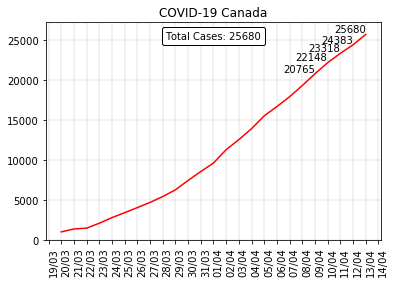

In [11]:
# canada totals line chart from March 2020
ylim_num = ca_counts[-1]
fig, ax = plt.subplots()  # Create a figure containing a single axes.

#xfmt = mdates.DateFormatter('%d/%m/%y')
xfmt = mdates.DateFormatter('%d/%m')
ax.xaxis.set_major_formatter(xfmt)

locator = MaxNLocator(nbins=28) # with 14 bins you will have 13 ticks
ax.xaxis.set_major_locator(locator)

plt.xticks(rotation=90, va='top', ha='left', fontsize=10)
ax.grid(color='grey', linestyle='-', linewidth=0.2)
ax.plot(ca_dates, ca_counts, color='red')  # Plot some data on the axes.

ax.annotate(str(ca_counts[-1]),xy=(ca_dates[-1],ca_counts[-1]), horizontalalignment='right', verticalalignment='bottom', clip_on=True)
ax.annotate(str(ca_counts[-2]),xy=(ca_dates[-2],ca_counts[-2]), horizontalalignment='right', verticalalignment='bottom', clip_on=True)
ax.annotate(str(ca_counts[-3]),xy=(ca_dates[-3],ca_counts[-3]), horizontalalignment='right', verticalalignment='bottom', clip_on=True)
ax.annotate(str(ca_counts[-4]),xy=(ca_dates[-4],ca_counts[-4]), horizontalalignment='right', verticalalignment='bottom', clip_on=True)
ax.annotate(str(ca_counts[-5]),xy=(ca_dates[-5],ca_counts[-5]), horizontalalignment='right', verticalalignment='bottom', clip_on=True)

from matplotlib.offsetbox import AnchoredText
at = AnchoredText('Total Cases: ' + str(ca_counts[-1]),
                  prop=dict(size=10), frameon=True,
                  loc='upper center',
                  )
at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
ax.add_artist(at)


plt.ylim(0, ylim_num+1500)
plt.title('COVID-19 Canada')
#plt.legend(loc='upper center')
plt.savefig('GOC_can_covid-19.png')
plt.show()

In [12]:
can_chg = can_totals

In [13]:
can_chg['pct_chg'] = round(can_chg['numtotal'].pct_change(fill_method='ffill')*100,1)
can_chg = can_chg[-23:]

In [14]:
can_pctchg = can_chg['pct_chg'].values
can_pctdates = can_chg['date'].values
can_chg_numtotal = can_chg['numtotal'].values
can_chg_numtotal[-2] - can_chg_numtotal[-3]

1065

In [15]:
ca_perc_ave = round(can_pctchg.sum() / len(can_pctchg),1)
ca_7day_ave = round(can_pctchg[-7:].sum() / len(can_pctchg[-7:]),1)
ca_5day_ave = round(can_pctchg[-5:].sum() / len(can_pctchg[-5:]),1)
ca_std = round(can_pctchg[-7:].std(),1)
str(ca_5day_ave)

'5.9'

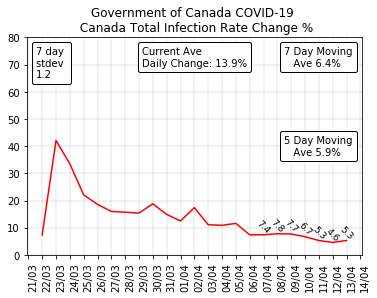

In [16]:
fig, ax = plt.subplots()  # Create a figure containing a single axes.

#xfmt = mdates.DateFormatter('%d/%m/%y')
xfmt = mdates.DateFormatter('%d/%m')
ax.xaxis.set_major_formatter(xfmt)

locator = MaxNLocator(nbins=30) # with 14 bins you will have 13 ticks
ax.xaxis.set_major_locator(locator)

plt.xticks(rotation=90, va='top', ha='left', fontsize=10)
ax.grid(color='grey', linestyle='-', linewidth=0.2)
ax.plot(can_pctdates, can_pctchg, color='red')  # Plot some data on the axes.

ax.annotate(str(can_pctchg[-1]),xy=(can_pctdates[-1],can_pctchg[-1]), horizontalalignment='center', verticalalignment='bottom', rotation=-45, fontsize=9)
ax.annotate(str(can_pctchg[-2]),xy=(can_pctdates[-2],can_pctchg[-2]), horizontalalignment='center', verticalalignment='bottom', rotation=-45, fontsize=9)
ax.annotate(str(can_pctchg[-3]),xy=(can_pctdates[-3],can_pctchg[-3]), horizontalalignment='center', verticalalignment='bottom', rotation=-45, fontsize=9)
ax.annotate(str(can_pctchg[-4]),xy=(can_pctdates[-4],can_pctchg[-4]), horizontalalignment='center', verticalalignment='bottom', rotation=-45, fontsize=9)
ax.annotate(str(can_pctchg[-5]),xy=(can_pctdates[-5],can_pctchg[-5]), horizontalalignment='center', verticalalignment='bottom', rotation=-45, fontsize=9)
ax.annotate(str(can_pctchg[-6]),xy=(can_pctdates[-6],can_pctchg[-6]), horizontalalignment='center', verticalalignment='bottom', rotation=-45, fontsize=9)
ax.annotate(str(can_pctchg[-7]),xy=(can_pctdates[-7],can_pctchg[-7]), horizontalalignment='center', verticalalignment='bottom', rotation=-45, fontsize=9)

from matplotlib.offsetbox import AnchoredText
at = AnchoredText('Current Ave \nDaily Change: ' + str(ca_perc_ave)+'%',
                  prop=dict(size=10), frameon=True,
                  loc='upper center',
                  )
at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
ax.add_artist(at)

at = AnchoredText('7 day \nstdev \n' + str(ca_std),
                  prop=dict(size=10), frameon=True,
                  loc='upper left',
                  )
at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
ax.add_artist(at)

at = AnchoredText('7 Day Moving\n   Ave ' + str(ca_7day_ave) +"%",
                  prop=dict(size=10), frameon=True,
                  loc='upper right',
                  )
at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
ax.add_artist(at)

at = AnchoredText('5 Day Moving\n   Ave ' + str(ca_5day_ave) +"%",
                  prop=dict(size=10), frameon=True,
                  loc='center right',
                  )
at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
ax.add_artist(at)

plt.ylim(0, 80)
plt.title('Government of Canada COVID-19 \n Canada Total Infection Rate Change %')
plt.savefig('GOC_Canada_covid-19_pct_change.png')
plt.show()

In [17]:
can_pctchg[-7:]

array([7.4, 7.8, 7.7, 6.7, 5.3, 4.6, 5.3])